# Case Study A-Z: A Machine Learning powered Strategy (DNN)

_Disclaimer: <br>
The following illustrative example is for general information and educational purposes only. <br>
It is neither investment advice nor a recommendation to trade, invest or take whatsoever actions.<br>
The below code should only be used in combination with an Oanda/FXCM Practice/Demo Account and NOT with a Live Trading Account._

## Getting and Preparing the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [2]:
data = pd.read_csv("DNN_data.csv", parse_dates = ["time"], index_col = "time")

In [3]:
data 

,EUR_USD
time,
2017-01-02 23:20:00,1.04574
2017-01-02 23:40:00,1.04608
2017-01-03 00:00:00,1.04575
2017-01-03 00:20:00,1.04672
2017-01-03 00:40:00,1.04696
...,...
2019-12-30 23:00:00,1.12012
2019-12-30 23:20:00,1.12030
2019-12-30 23:40:00,1.12018


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 55785 entries, 2017-01-02 23:20:00 to 2019-12-31 00:20:00
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   EUR_USD  55785 non-null  float64
dtypes: float64(1)
memory usage: 871.6 KB


In [5]:
symbol = data.columns[0]
symbol

'EUR_USD'

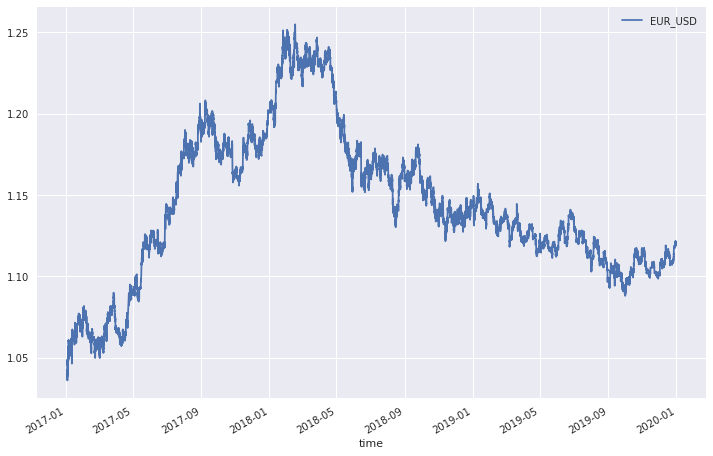

In [6]:
data.plot(figsize = (12, 8))
plt.show()

In [7]:
data["returns"] = np.log(data[symbol] / data[symbol].shift())

In [8]:
data

,EUR_USD,returns
time,,
2017-01-02 23:20:00,1.04574,NaN
2017-01-02 23:40:00,1.04608,0.00033
2017-01-03 00:00:00,1.04575,-0.00032
2017-01-03 00:20:00,1.04672,0.00093
2017-01-03 00:40:00,1.04696,0.00023
...,...,...
2019-12-30 23:00:00,1.12012,0.00008
2019-12-30 23:20:00,1.12030,0.00016
2019-12-30 23:40:00,1.12018,-0.00011


## Adding Label/Features

In [9]:
window = 50

In [10]:
df = data.copy()
df["dir"] = np.where(df["returns"] > 0, 1, 0)
df["sma"] = df[symbol].rolling(window).mean() - df[symbol].rolling(150).mean()
df["boll"] = (df[symbol] - df[symbol].rolling(window).mean()) / df[symbol].rolling(window).std()
df["min"] = df[symbol].rolling(window).min() / df[symbol] - 1
df["max"] = df[symbol].rolling(window).max() / df[symbol] - 1
df["mom"] = df["returns"].rolling(3).mean()
df["vol"] = df["returns"].rolling(window).std()
df.dropna(inplace = True)

In [11]:
df

,EUR_USD,returns,dir,sma,boll,min,max,mom,vol
time,,,,,,,,,
2017-01-05 01:00:00,1.05406,0.00173,1,0.00275,2.77761,-0.01095,0.00000,0.00138,0.00080
2017-01-05 01:20:00,1.05226,-0.00171,0,0.00290,2.00028,-0.00905,0.00171,-0.00010,0.00084
2017-01-05 01:40:00,1.05138,-0.00084,0,0.00302,1.60440,-0.00822,0.00255,-0.00027,0.00085
2017-01-05 02:00:00,1.05196,0.00055,1,0.00314,1.71886,-0.00876,0.00200,-0.00066,0.00085
2017-01-05 02:20:00,1.05230,0.00032,1,0.00327,1.74272,-0.00908,0.00167,0.00001,0.00085
...,...,...,...,...,...,...,...,...,...
2019-12-30 23:00:00,1.12012,0.00008,1,0.00316,0.11606,-0.00136,0.00145,0.00006,0.00041
2019-12-30 23:20:00,1.12030,0.00016,1,0.00312,0.33557,-0.00152,0.00129,-0.00003,0.00040
2019-12-30 23:40:00,1.12018,-0.00011,0,0.00306,0.15542,-0.00141,0.00139,0.00004,0.00039


## Adding Feature lags

In [12]:
lags = 5

In [13]:
cols = []
features = ["dir", "sma", "boll", "min", "max", "mom", "vol"]

In [14]:
for f in features:
        for lag in range(1, lags + 1):
            col = "{}_lag_{}".format(f, lag)
            df[col] = df[f].shift(lag)
            cols.append(col)
df.dropna(inplace = True)

In [15]:
df

,EUR_USD,returns,dir,sma,boll,min,max,mom,vol,dir_lag_1,...,mom_lag_1,mom_lag_2,mom_lag_3,mom_lag_4,mom_lag_5,vol_lag_1,vol_lag_2,vol_lag_3,vol_lag_4,vol_lag_5
time,,,,,,,,,,,,,,,,,,,,,
2017-01-05 02:40:00,1.05124,-0.00101,0,0.00339,1.32277,-0.00809,0.00268,-0.00004,0.00086,1.00000,...,0.00001,-0.00066,-0.00027,-0.00010,0.00138,0.00085,0.00085,0.00085,0.00084,0.00080
2017-01-05 03:00:00,1.05150,0.00025,1,0.00351,1.35516,-0.00833,0.00243,-0.00015,0.00086,0.00000,...,-0.00004,0.00001,-0.00066,-0.00027,-0.00010,0.00086,0.00085,0.00085,0.00085,0.00084
2017-01-05 03:20:00,1.05230,0.00076,1,0.00365,1.55709,-0.00908,0.00167,-0.00000,0.00086,1.00000,...,-0.00015,-0.00004,0.00001,-0.00066,-0.00027,0.00086,0.00086,0.00085,0.00085,0.00085
2017-01-05 03:40:00,1.05192,-0.00036,0,0.00380,1.37543,-0.00873,0.00203,0.00022,0.00086,1.00000,...,-0.00000,-0.00015,-0.00004,0.00001,-0.00066,0.00086,0.00086,0.00086,0.00085,0.00085
2017-01-05 04:00:00,1.05204,0.00011,1,0.00392,1.35764,-0.00884,0.00192,0.00017,0.00085,0.00000,...,0.00022,-0.00000,-0.00015,-0.00004,0.00001,0.00086,0.00086,0.00086,0.00086,0.00085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-30 23:00:00,1.12012,0.00008,1,0.00316,0.11606,-0.00136,0.00145,0.00006,0.00041,0.00000,...,-0.00007,0.00007,0.00002,0.00010,0.00010,0.00041,0.00041,0.00040,0.00040,0.00040
2019-12-30 23:20:00,1.12030,0.00016,1,0.00312,0.33557,-0.00152,0.00129,-0.00003,0.00040,1.00000,...,0.00006,-0.00007,0.00007,0.00002,0.00010,0.00041,0.00041,0.00041,0.00040,0.00040
2019-12-30 23:40:00,1.12018,-0.00011,0,0.00306,0.15542,-0.00141,0.00139,0.00004,0.00039,1.00000,...,-0.00003,0.00006,-0.00007,0.00007,0.00002,0.00040,0.00041,0.00041,0.00041,0.00040


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 55631 entries, 2017-01-05 02:40:00 to 2019-12-31 00:20:00
Data columns (total 44 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   EUR_USD     55631 non-null  float64
 1   returns     55631 non-null  float64
 2   dir         55631 non-null  int64  
 3   sma         55631 non-null  float64
 4   boll        55631 non-null  float64
 5   min         55631 non-null  float64
 6   max         55631 non-null  float64
 7   mom         55631 non-null  float64
 8   vol         55631 non-null  float64
 9   dir_lag_1   55631 non-null  float64
 10  dir_lag_2   55631 non-null  float64
 11  dir_lag_3   55631 non-null  float64
 12  dir_lag_4   55631 non-null  float64
 13  dir_lag_5   55631 non-null  float64
 14  sma_lag_1   55631 non-null  float64
 15  sma_lag_2   55631 non-null  float64
 16  sma_lag_3   55631 non-null  float64
 17  sma_lag_4   55631 non-null  float64
 18  sma_lag_5   55631 non-null  flo

In [17]:
len(cols)

35

## Splitting into Train and Test Set

In [18]:
len(df)

55631

In [19]:
split = int(len(df)*0.66)
split

36716

In [20]:
train = df.iloc[:split].copy()
train

,EUR_USD,returns,dir,sma,boll,min,max,mom,vol,dir_lag_1,...,mom_lag_1,mom_lag_2,mom_lag_3,mom_lag_4,mom_lag_5,vol_lag_1,vol_lag_2,vol_lag_3,vol_lag_4,vol_lag_5
time,,,,,,,,,,,,,,,,,,,,,
2017-01-05 02:40:00,1.05124,-0.00101,0,0.00339,1.32277,-0.00809,0.00268,-0.00004,0.00086,1.00000,...,0.00001,-0.00066,-0.00027,-0.00010,0.00138,0.00085,0.00085,0.00085,0.00084,0.00080
2017-01-05 03:00:00,1.05150,0.00025,1,0.00351,1.35516,-0.00833,0.00243,-0.00015,0.00086,0.00000,...,-0.00004,0.00001,-0.00066,-0.00027,-0.00010,0.00086,0.00085,0.00085,0.00085,0.00084
2017-01-05 03:20:00,1.05230,0.00076,1,0.00365,1.55709,-0.00908,0.00167,-0.00000,0.00086,1.00000,...,-0.00015,-0.00004,0.00001,-0.00066,-0.00027,0.00086,0.00086,0.00085,0.00085,0.00085
2017-01-05 03:40:00,1.05192,-0.00036,0,0.00380,1.37543,-0.00873,0.00203,0.00022,0.00086,1.00000,...,-0.00000,-0.00015,-0.00004,0.00001,-0.00066,0.00086,0.00086,0.00086,0.00085,0.00085
2017-01-05 04:00:00,1.05204,0.00011,1,0.00392,1.35764,-0.00884,0.00192,0.00017,0.00085,0.00000,...,0.00022,-0.00000,-0.00015,-0.00004,0.00001,0.00086,0.00086,0.00086,0.00086,0.00085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-23 23:40:00,1.13718,0.00006,1,-0.00202,-0.94581,-0.00113,0.00890,0.00020,0.00078,1.00000,...,0.00025,-0.00009,0.00013,0.00009,0.00038,0.00078,0.00078,0.00078,0.00078,0.00078
2018-12-24 00:00:00,1.13724,0.00005,1,-0.00219,-0.89554,-0.00119,0.00885,0.00011,0.00078,1.00000,...,0.00020,0.00025,-0.00009,0.00013,0.00009,0.00078,0.00078,0.00078,0.00078,0.00078
2018-12-24 00:20:00,1.13755,0.00027,1,-0.00237,-0.77108,-0.00146,0.00857,0.00013,0.00077,1.00000,...,0.00011,0.00020,0.00025,-0.00009,0.00013,0.00078,0.00078,0.00078,0.00078,0.00078


In [21]:
test = df.iloc[split:].copy()
test

,EUR_USD,returns,dir,sma,boll,min,max,mom,vol,dir_lag_1,...,mom_lag_1,mom_lag_2,mom_lag_3,mom_lag_4,mom_lag_5,vol_lag_1,vol_lag_2,vol_lag_3,vol_lag_4,vol_lag_5
time,,,,,,,,,,,,,,,,,,,,,
2018-12-24 01:20:00,1.13780,-0.00004,0,-0.00290,-0.61860,-0.00168,0.00582,0.00007,0.00076,1.00000,...,0.00018,0.00015,0.00013,0.00011,0.00020,0.00077,0.00077,0.00077,0.00078,0.00078
2018-12-24 01:40:00,1.13770,-0.00009,0,-0.00303,-0.62974,-0.00159,0.00466,0.00000,0.00073,0.00000,...,0.00007,0.00018,0.00015,0.00013,0.00011,0.00076,0.00077,0.00077,0.00077,0.00078
2018-12-24 02:00:00,1.13806,0.00032,1,-0.00313,-0.45011,-0.00191,0.00418,0.00006,0.00072,0.00000,...,0.00000,0.00007,0.00018,0.00015,0.00013,0.00073,0.00076,0.00077,0.00077,0.00077
2018-12-24 02:20:00,1.13791,-0.00013,0,-0.00322,-0.48362,-0.00178,0.00431,0.00003,0.00072,1.00000,...,0.00006,0.00000,0.00007,0.00018,0.00015,0.00072,0.00073,0.00076,0.00077,0.00077
2018-12-24 02:40:00,1.13865,0.00065,1,-0.00331,-0.12870,-0.00242,0.00340,0.00028,0.00072,0.00000,...,0.00003,0.00006,0.00000,0.00007,0.00018,0.00072,0.00072,0.00073,0.00076,0.00077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-30 23:00:00,1.12012,0.00008,1,0.00316,0.11606,-0.00136,0.00145,0.00006,0.00041,0.00000,...,-0.00007,0.00007,0.00002,0.00010,0.00010,0.00041,0.00041,0.00040,0.00040,0.00040
2019-12-30 23:20:00,1.12030,0.00016,1,0.00312,0.33557,-0.00152,0.00129,-0.00003,0.00040,1.00000,...,0.00006,-0.00007,0.00007,0.00002,0.00010,0.00041,0.00041,0.00041,0.00040,0.00040
2019-12-30 23:40:00,1.12018,-0.00011,0,0.00306,0.15542,-0.00141,0.00139,0.00004,0.00039,1.00000,...,-0.00003,0.00006,-0.00007,0.00007,0.00002,0.00040,0.00041,0.00041,0.00041,0.00040


## Feature Scaling (Standardization)

In [22]:
train[cols]

,dir_lag_1,dir_lag_2,dir_lag_3,dir_lag_4,dir_lag_5,sma_lag_1,sma_lag_2,sma_lag_3,sma_lag_4,sma_lag_5,...,mom_lag_1,mom_lag_2,mom_lag_3,mom_lag_4,mom_lag_5,vol_lag_1,vol_lag_2,vol_lag_3,vol_lag_4,vol_lag_5
time,,,,,,,,,,,,,,,,,,,,,
2017-01-05 02:40:00,1.00000,1.00000,0.00000,0.00000,1.00000,0.00327,0.00314,0.00302,0.00290,0.00275,...,0.00001,-0.00066,-0.00027,-0.00010,0.00138,0.00085,0.00085,0.00085,0.00084,0.00080
2017-01-05 03:00:00,0.00000,1.00000,1.00000,0.00000,0.00000,0.00339,0.00327,0.00314,0.00302,0.00290,...,-0.00004,0.00001,-0.00066,-0.00027,-0.00010,0.00086,0.00085,0.00085,0.00085,0.00084
2017-01-05 03:20:00,1.00000,0.00000,1.00000,1.00000,0.00000,0.00351,0.00339,0.00327,0.00314,0.00302,...,-0.00015,-0.00004,0.00001,-0.00066,-0.00027,0.00086,0.00086,0.00085,0.00085,0.00085
2017-01-05 03:40:00,1.00000,1.00000,0.00000,1.00000,1.00000,0.00365,0.00351,0.00339,0.00327,0.00314,...,-0.00000,-0.00015,-0.00004,0.00001,-0.00066,0.00086,0.00086,0.00086,0.00085,0.00085
2017-01-05 04:00:00,0.00000,1.00000,1.00000,0.00000,1.00000,0.00380,0.00365,0.00351,0.00339,0.00327,...,0.00022,-0.00000,-0.00015,-0.00004,0.00001,0.00086,0.00086,0.00086,0.00086,0.00085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-23 23:40:00,1.00000,1.00000,1.00000,0.00000,1.00000,-0.00186,-0.00170,-0.00153,-0.00138,-0.00122,...,0.00025,-0.00009,0.00013,0.00009,0.00038,0.00078,0.00078,0.00078,0.00078,0.00078
2018-12-24 00:00:00,1.00000,1.00000,1.00000,1.00000,0.00000,-0.00202,-0.00186,-0.00170,-0.00153,-0.00138,...,0.00020,0.00025,-0.00009,0.00013,0.00009,0.00078,0.00078,0.00078,0.00078,0.00078
2018-12-24 00:20:00,1.00000,1.00000,1.00000,1.00000,1.00000,-0.00219,-0.00202,-0.00186,-0.00170,-0.00153,...,0.00011,0.00020,0.00025,-0.00009,0.00013,0.00078,0.00078,0.00078,0.00078,0.00078


In [23]:
mu, std = train.mean(), train.std() # train set parameters (mu, std) for standardization

In [24]:
std

EUR_USD      0.05121
returns      0.00054
dir          0.49996
sma          0.00287
boll         1.44147
min          0.00237
max          0.00225
mom          0.00031
vol          0.00018
dir_lag_1    0.49996
dir_lag_2    0.49996
dir_lag_3    0.49996
dir_lag_4    0.49996
dir_lag_5    0.49996
sma_lag_1    0.00287
sma_lag_2    0.00287
sma_lag_3    0.00287
sma_lag_4    0.00287
sma_lag_5    0.00287
boll_lag_1   1.44150
boll_lag_2   1.44152
boll_lag_3   1.44154
boll_lag_4   1.44157
boll_lag_5   1.44163
min_lag_1    0.00237
min_lag_2    0.00237
min_lag_3    0.00237
min_lag_4    0.00237
min_lag_5    0.00237
max_lag_1    0.00225
max_lag_2    0.00225
max_lag_3    0.00225
max_lag_4    0.00225
max_lag_5    0.00225
mom_lag_1    0.00031
mom_lag_2    0.00031
mom_lag_3    0.00031
mom_lag_4    0.00031
mom_lag_5    0.00031
vol_lag_1    0.00018
vol_lag_2    0.00018
vol_lag_3    0.00018
vol_lag_4    0.00018
vol_lag_5    0.00018
dtype: float64

In [25]:
train_s = (train - mu) / std # standardization of train set features

In [26]:
train_s

,EUR_USD,returns,dir,sma,boll,min,max,mom,vol,dir_lag_1,...,mom_lag_1,mom_lag_2,mom_lag_3,mom_lag_4,mom_lag_5,vol_lag_1,vol_lag_2,vol_lag_3,vol_lag_4,vol_lag_5
time,,,,,,,,,,,,,,,,,,,,,
2017-01-05 02:40:00,-2.04937,-1.86478,-0.98635,1.13118,0.90750,-2.34316,0.12084,-0.15119,1.95530,1.01381,...,0.03425,-2.16691,-0.89242,-0.33613,4.49168,1.87821,1.87742,1.88615,1.84658,1.63281
2017-01-05 03:00:00,-2.04429,0.45268,1.01381,1.17515,0.92997,-2.44672,0.01062,-0.48070,1.94553,-0.98635,...,-0.15117,0.03432,-2.16686,-0.89240,-0.33615,1.95524,1.87817,1.87737,1.88611,1.84657
2017-01-05 03:20:00,-2.02867,1.40031,1.01381,1.22385,1.07006,-2.76504,-0.32820,-0.00694,1.96957,1.01381,...,-0.48069,-0.15109,0.03435,-2.16684,-0.89226,1.94548,1.95520,1.87812,1.87733,1.88609
2017-01-05 03:40:00,-2.03609,-0.67081,-0.98635,1.27513,0.94404,-2.61390,-0.16733,0.69350,1.96584,1.01381,...,-0.00693,-0.48059,-0.15105,0.03437,-2.16636,1.96952,1.94543,1.95514,1.87808,1.87732
2017-01-05 04:00:00,-2.03375,0.20669,1.01381,1.31799,0.93169,-2.66164,-0.21814,0.54919,1.90611,-0.98635,...,0.69351,-0.00685,-0.48055,-0.15104,0.03426,1.96579,1.96947,1.94538,1.95510,1.87806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-23 23:40:00,-0.37115,0.10973,1.01381,-0.75175,-0.66629,0.59187,2.88473,0.63144,1.49751,1.01381,...,0.80307,-0.31169,0.40306,0.27921,1.22213,1.50812,1.50046,1.51651,1.51163,1.47850
2018-12-24 00:00:00,-0.36998,0.09349,1.01381,-0.81123,-0.63141,0.56962,2.86106,0.35506,1.48584,1.01381,...,0.63145,0.80309,-0.31165,0.40308,0.27903,1.49747,1.50808,1.50042,1.51648,1.51162
2018-12-24 00:20:00,-0.36393,0.49931,1.01381,-0.87442,-0.54507,0.45469,2.73883,0.41211,1.45186,1.01381,...,0.35507,0.63149,0.80312,-0.31163,0.40286,1.48580,1.49743,1.50804,1.50038,1.51646


In [27]:
train_s.describe()

,EUR_USD,returns,dir,sma,boll,min,max,mom,vol,dir_lag_1,...,mom_lag_1,mom_lag_2,mom_lag_3,mom_lag_4,mom_lag_5,vol_lag_1,vol_lag_2,vol_lag_3,vol_lag_4,vol_lag_5
count,36716.00000,36716.00000,36716.00000,36716.00000,36716.00000,36716.00000,36716.00000,36716.00000,36716.00000,36716.00000,...,36716.00000,36716.00000,36716.00000,36716.00000,36716.00000,36716.00000,36716.00000,36716.00000,36716.00000,36716.00000
mean,0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,...,0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000
std,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,...,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000
min,-2.14427,-15.49849,-0.98635,-4.52905,-4.35636,-7.23579,-1.07180,-11.84536,-2.02052,-0.98635,...,-11.84540,-11.84461,-11.84447,-11.84445,-11.84137,-2.02049,-2.02046,-2.02044,-2.02041,-2.02040
25%,-0.50472,-0.45358,-0.98635,-0.67758,-0.73979,-0.48565,-0.75323,-0.46080,-0.67030,-0.98635,...,-0.46079,-0.46070,-0.46069,-0.46067,-0.46065,-0.67030,-0.67030,-0.67030,-0.67030,-0.67030
50%,0.16948,-0.00393,-0.98635,-0.02444,0.01612,0.28270,-0.27229,-0.00694,-0.18088,-0.98635,...,-0.00693,-0.00685,-0.00682,-0.00680,-0.00690,-0.18089,-0.18090,-0.18091,-0.18091,-0.18091
75%,0.58278,0.45663,1.01381,0.65822,0.74353,0.74441,0.50010,0.45772,0.43962,1.01381,...,0.45767,0.45761,0.45764,0.45766,0.45743,0.43960,0.43958,0.43956,0.43954,0.43953
max,1.92844,28.48640,1.01381,3.40071,4.37520,1.07084,9.18993,18.74853,10.35454,1.01381,...,18.74863,18.74756,18.74743,18.74746,18.74230,10.35432,10.35411,10.35389,10.35371,10.35365


## Creating and Fitting the DNN Model

In [28]:
from DNNModel import *

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
# fitting a DNN model with 3 Hidden Layers (50 nodes each) and dropout regularization

set_seeds(100)
model = create_model(hl = 3, hu = 50, dropout = True, input_dim = len(cols))
model.fit(x = train_s[cols], y = train["dir"], epochs = 50, verbose = False,
          validation_split = 0.2, shuffle = False, class_weight = cw(train))

In [ ]:
model.evaluate(train_s[cols], train["dir"]) # evaluate the fit on the train set

In [ ]:
pred = model.predict(train_s[cols]) # prediction (probabilities)
pred

In [ ]:
plt.hist(pred, bins = 50)
plt.show()

## Out-Sample Prediction and Forward Testing

In [ ]:
test

In [ ]:
test_s = (test - mu) / std # standardization of test set features (with train set parameters!!!)

In [ ]:
model.evaluate(test_s[cols], test["dir"])

In [ ]:
pred = model.predict(test_s[cols])
pred

In [ ]:
plt.hist(pred, bins = 50);

In [ ]:
test["proba"] = model.predict(test_s[cols])

In [ ]:
test["position"] = np.where(test.proba < 0.47, -1, np.nan) # 1. short where proba < 0.47

In [ ]:
test["position"] = np.where(test.proba > 0.53, 1, test.position) # 2. long where proba > 0.53

In [ ]:
test.index = test.index.tz_localize("UTC")
test["NYTime"] = test.index.tz_convert("America/New_York")
test["hour"] = test.NYTime.dt.hour

In [ ]:
test["position"] = np.where(~test.hour.between(2, 12), 0, test.position) # 3. neutral in non-busy hours

In [ ]:
test["position"] = test.position.ffill().fillna(0) # 4. in all other cases: hold position

In [ ]:
test.position.value_counts(dropna = False)

In [ ]:
test["strategy"] = test["position"] * test["returns"]

In [ ]:
test["creturns"] = test["returns"].cumsum().apply(np.exp)
test["cstrategy"] = test["strategy"].cumsum().apply(np.exp)

In [ ]:
test[["creturns", "cstrategy"]].plot(figsize = (12, 8))
plt.show()

In [ ]:
ptc = 0.000059

In [ ]:
test["trades"] = test.position.diff().abs()

In [ ]:
test.trades.value_counts()

In [ ]:
test["strategy_net"] = test.strategy - test.trades * ptc

In [ ]:
test["cstrategy_net"] = test["strategy_net"].cumsum().apply(np.exp)

In [ ]:
test[["creturns", "cstrategy", "cstrategy_net"]].plot(figsize = (12, 8))
plt.show()

## Saving Model and Parameters

In [ ]:
model

In [ ]:
mu

In [ ]:
std

In [ ]:
model.save("DNN_model")

In [ ]:
import pickle

In [ ]:
params = {"mu":mu, "std":std}

In [ ]:
params

In [ ]:
pickle.dump(params, open("params.pkl", "wb"))

## Implementation

In [ ]:
import pandas as pd
import numpy as np
import tpqoa
import fxcmpy
from datetime import datetime, timedelta
import time

__Loading Model and Parameters__

In [ ]:
# Loading the model
import keras
model = keras.models.load_model("DNN_model")

In [ ]:
model

In [ ]:
# Loading mu and std
import pickle
params = pickle.load(open("params.pkl", "rb"))
mu = params["mu"]
std = params["std"]

In [ ]:
mu

In [ ]:
std

__[Oanda] Implementation__

In [ ]:
class DNNTrader(tpqoa.tpqoa):
    def __init__(self, conf_file, instrument, bar_length, window, lags, model, mu, std, units):
        super().__init__(conf_file)
        self.instrument = instrument
        self.bar_length = pd.to_timedelta(bar_length)
        self.tick_data = pd.DataFrame()
        self.raw_data = None
        self.data = None 
        self.last_bar = None
        self.units = units
        self.position = 0
        self.profits = []
        
        #*****************add strategy-specific attributes here******************
        self.window = window
        self.lags = lags
        self.model = model
        self.mu = mu
        self.std = std
        #************************************************************************
    
    def get_most_recent(self, days = 5):
        while True:
            time.sleep(2)
            now = datetime.utcnow()
            now = now - timedelta(microseconds = now.microsecond)
            past = now - timedelta(days = days)
            df = self.get_history(instrument = self.instrument, start = past, end = now,
                                   granularity = "S5", price = "M", localize = False).c.dropna().to_frame()
            df.rename(columns = {"c":self.instrument}, inplace = True)
            df = df.resample(self.bar_length, label = "right").last().dropna().iloc[:-1]
            self.raw_data = df.copy()
            self.last_bar = self.raw_data.index[-1]
            if pd.to_datetime(datetime.utcnow()).tz_localize("UTC") - self.last_bar < self.bar_length:
                self.start_time = pd.to_datetime(datetime.utcnow()).tz_localize("UTC") # NEW -> Start Time of Trading Session
                break
                
    def on_success(self, time, bid, ask):
        print(self.ticks, end = " ", flush = True)
        
        recent_tick = pd.to_datetime(time)
        df = pd.DataFrame({self.instrument:(ask + bid)/2}, 
                          index = [recent_tick])
        self.tick_data = self.tick_data.append(df)
        
        if recent_tick - self.last_bar > self.bar_length:
            self.resample_and_join()
            self.define_strategy()
            self.execute_trades()
    
    def resample_and_join(self):
        self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length, 
                                                                  label="right").last().ffill().iloc[:-1])
        self.tick_data = self.tick_data.iloc[-1:]
        self.last_bar = self.raw_data.index[-1]
    
    def define_strategy(self): # "strategy-specific"
        df = self.raw_data.copy()
        
        #******************** define your strategy here ************************
        #create features
        df = df.append(self.tick_data) # append latest tick (== open price of current bar)
        df["returns"] = np.log(df[self.instrument] / df[self.instrument].shift())
        df["dir"] = np.where(df["returns"] > 0, 1, 0)
        df["sma"] = df[self.instrument].rolling(self.window).mean() - df[self.instrument].rolling(150).mean()
        df["boll"] = (df[self.instrument] - df[self.instrument].rolling(self.window).mean()) / df[self.instrument].rolling(self.window).std()
        df["min"] = df[self.instrument].rolling(self.window).min() / df[self.instrument] - 1
        df["max"] = df[self.instrument].rolling(self.window).max() / df[self.instrument] - 1
        df["mom"] = df["returns"].rolling(3).mean()
        df["vol"] = df["returns"].rolling(self.window).std()
        df.dropna(inplace = True)
        
        # create lags
        self.cols = []
        features = ["dir", "sma", "boll", "min", "max", "mom", "vol"]

        for f in features:
            for lag in range(1, self.lags + 1):
                col = "{}_lag_{}".format(f, lag)
                df[col] = df[f].shift(lag)
                self.cols.append(col)
        df.dropna(inplace = True)
        
        # standardization
        df_s = (df - self.mu) / self.std
        # predict
        df["proba"] = self.model.predict(df_s[self.cols])
        
        #determine positions
        df = df.loc[self.start_time:].copy() # starting with first live_stream bar (removing historical bars)
        df["position"] = np.where(df.proba < 0.47, -1, np.nan)
        df["position"] = np.where(df.proba > 0.53, 1, df.position)
        df["position"] = df.position.ffill().fillna(0) # start with neutral position if no strong signal
        #***********************************************************************
        
        self.data = df.copy()
    
    def execute_trades(self):
        if self.data["position"].iloc[-1] == 1:
            if self.position == 0:
                order = self.create_order(self.instrument, self.units, suppress = True, ret = True)
                self.report_trade(order, "GOING LONG")
            elif self.position == -1:
                order = self.create_order(self.instrument, self.units * 2, suppress = True, ret = True) 
                self.report_trade(order, "GOING LONG")
            self.position = 1
        elif self.data["position"].iloc[-1] == -1: 
            if self.position == 0:
                order = self.create_order(self.instrument, -self.units, suppress = True, ret = True)
                self.report_trade(order, "GOING SHORT")
            elif self.position == 1:
                order = self.create_order(self.instrument, -self.units * 2, suppress = True, ret = True)
                self.report_trade(order, "GOING SHORT")
            self.position = -1
        elif self.data["position"].iloc[-1] == 0: 
            if self.position == -1:
                order = self.create_order(self.instrument, self.units, suppress = True, ret = True) 
                self.report_trade(order, "GOING NEUTRAL")
            elif self.position == 1:
                order = self.create_order(self.instrument, -self.units, suppress = True, ret = True)
                self.report_trade(order, "GOING NEUTRAL")
            self.position = 0
    
    def report_trade(self, order, going):
        time = order["time"]
        units = order["units"]
        price = order["price"]
        pl = float(order["pl"])
        self.profits.append(pl)
        cumpl = sum(self.profits)
        print("\n" + 100* "-")
        print("{} | {}".format(time, going))
        print("{} | units = {} | price = {} | P&L = {} | Cum P&L = {}".format(time, units, price, pl, cumpl))
        print(100 * "-" + "\n")  

In [ ]:
trader = DNNTrader("oanda.cfg", "EUR_USD", bar_length = "20min",
                   window = 50, lags = 5, model = model, mu = mu, std = std, units = 100000)

In [ ]:
trader.get_most_recent()
trader.stream_data(trader.instrument, stop = 1000)
if trader.position != 0:
    close_order = trader.create_order(trader.instrument, units = -trader.position * trader.units,
                                      suppress = True, ret = True) 
    trader.report_trade(close_order, "GOING NEUTRAL")
    trader.position = 0

In [ ]:
trader.data

__[FXCM] Implementation__

In [ ]:
api = fxcmpy.fxcmpy(config_file= "fxcm.cfg")

In [ ]:
col = ["tradeId", "amountK", "currency", "grossPL", "isBuy"]

In [ ]:
class DNNTrader():
    
    def __init__(self, instrument, bar_length, window, lags, model, mu, std, units):
        self.instrument = instrument
        self.bar_length = pd.to_timedelta(bar_length) 
        self.tick_data = None
        self.raw_data = None
        self.data = None 
        self.ticks = 0
        self.last_bar = None  
        self.units = units
        self.position = 0
        
        #*****************add strategy-specific attributes here******************
        self.window = window
        self.lags = lags
        self.model = model
        self.mu = mu
        self.std = std
        #************************************************************************        
    
    def get_most_recent(self, period = "m1", number = 10000):
        while True:  
            time.sleep(5)
            df = api.get_candles(self.instrument, number = number, period = period, columns = ["bidclose", "askclose"])
            df[self.instrument] = (df.bidclose + df.askclose) / 2
            df = df[self.instrument].to_frame()
            df = df.resample(self.bar_length, label = "right").last().dropna().iloc[:-1]
            self.raw_data = df.copy()
            self.last_bar = self.raw_data.index[-1]
            if pd.to_datetime(datetime.utcnow()) - self.last_bar < self.bar_length:
                self.start_time = pd.to_datetime(datetime.utcnow()) # NEW -> Start Time of Trading Session
                break
    
    def get_tick_data(self, data, dataframe):
        
        self.ticks += 1
        print(self.ticks, end = " ", flush = True)
        
        recent_tick = pd.to_datetime(data["Updated"], unit = "ms")
        
        if recent_tick - self.last_bar > self.bar_length:
            self.tick_data = dataframe.loc[self.last_bar:, ["Bid", "Ask"]]
            self.tick_data[self.instrument] = (self.tick_data.Ask + self.tick_data.Bid)/2
            self.tick_data = self.tick_data[self.instrument].to_frame()
            self.resample_and_join()
            self.define_strategy() 
            self.execute_trades()
            
    def resample_and_join(self):
        self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length, 
                                                             label="right").last().ffill().iloc[:-1])
        self.last_bar = self.raw_data.index[-1]  
        
    def define_strategy(self): # "strategy-specific"
        df = self.raw_data.copy()
        
        #******************** define your strategy here ************************
        df = df.append(self.tick_data.iloc[-1]) # append latest tick (== open price of current bar)
        df["returns"] = np.log(df[self.instrument] / df[self.instrument].shift())
        df["dir"] = np.where(df["returns"] > 0, 1, 0)
        df["sma"] = df[self.instrument].rolling(self.window).mean() - df[self.instrument].rolling(150).mean()
        df["boll"] = (df[self.instrument] - df[self.instrument].rolling(self.window).mean()) / df[self.instrument].rolling(self.window).std()
        df["min"] = df[self.instrument].rolling(self.window).min() / df[self.instrument] - 1
        df["max"] = df[self.instrument].rolling(self.window).max() / df[self.instrument] - 1
        df["mom"] = df["returns"].rolling(3).mean()
        df["vol"] = df["returns"].rolling(self.window).std()
        df.dropna(inplace = True)
        
        # create lags
        self.cols = []
        features = ["dir", "sma", "boll", "min", "max", "mom", "vol"]

        for f in features:
            for lag in range(1, self.lags + 1):
                col = "{}_lag_{}".format(f, lag)
                df[col] = df[f].shift(lag)
                self.cols.append(col)
        df.dropna(inplace = True)
        
        # standardization
        df_s = (df - self.mu) / self.std
        # predict
        df["proba"] = self.model.predict(df_s[self.cols])
        
        #determine positions
        df = df.loc[self.start_time:].copy() # starting with first live_stream bar (removing historical bars)
        df["position"] = np.where(df.proba < 0.47, -1, np.nan)
        df["position"] = np.where(df.proba > 0.53, 1, df.position)
        df["position"] = df.position.ffill().fillna(0) # start with neutral position if no strong signal
        #***********************************************************************
        
        self.data = df.copy()
    
    def execute_trades(self):
        if self.data["position"].iloc[-1] == 1:
            if self.position == 0:
                order = api.create_market_buy_order(self.instrument, self.units)
                self.report_trade(order, "GOING LONG")  
            elif self.position == -1:
                order = api.create_market_buy_order(self.instrument, self.units * 2)
                self.report_trade(order, "GOING LONG")  
            self.position = 1
        elif self.data["position"].iloc[-1] == -1: 
            if self.position == 0:
                order = api.create_market_sell_order(self.instrument, self.units)
                self.report_trade(order, "GOING SHORT")  
            elif self.position == 1:
                order = api.create_market_sell_order(self.instrument, self.units * 2)
                self.report_trade(order, "GOING SHORT")  
            self.position = -1
        elif self.data["position"].iloc[-1] == 0: 
            if self.position == -1:
                order = api.create_market_buy_order(self.instrument, self.units)
                self.report_trade(order, "GOING NEUTRAL") 
            elif self.position == 1:
                order = api.create_market_sell_order(self.instrument, self.units)
                self.report_trade(order, "GOING NEUTRAL")  
            self.position = 0

    def report_trade(self, order, going):
        time = order.get_time()
        units = api.get_open_positions().amountK.iloc[-1]
        price = api.get_open_positions().open.iloc[-1]
        unreal_pl = api.get_open_positions().grossPL.sum()
        print("\n" + 100* "-")
        print("{} | {}".format(time, going))
        print("{} | units = {} | price = {} | Unreal. P&L = {}".format(time, units, price, unreal_pl))
        print(100 * "-" + "\n")

In [ ]:
trader = DNNTrader("EUR/USD", bar_length = "20min", 
                   window = 50, lags = 5, model = model, mu = mu, std = std, units = 100)

In [ ]:
trader.get_most_recent()
api.subscribe_market_data(trader.instrument, (trader.get_tick_data, ))

In [ ]:
api.unsubscribe_market_data(trader.instrument)
if len(api.get_open_positions()) != 0: # if we have final open position(s) (netting and hedging)
    api.close_all_for_symbol(trader.instrument)
    print(2*"\n" + "{} | GOING NEUTRAL".format(str(datetime.utcnow())) + "\n")
    time.sleep(20)
    print(api.get_closed_positions_summary()[col])
    trader.position = 0

In [ ]:
trader.data

In [ ]:
api.close()